In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Part A:**

In [ ]:
babies = pd.read_csv('/content/sample_data/babies.data', sep=r'\s+')
babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


In [ ]:
# Cleaning the data
babies = babies[~((babies['bwt'] == 999) | (babies['smoke'] == 9))]

In [ ]:
#print(babies.to_string())

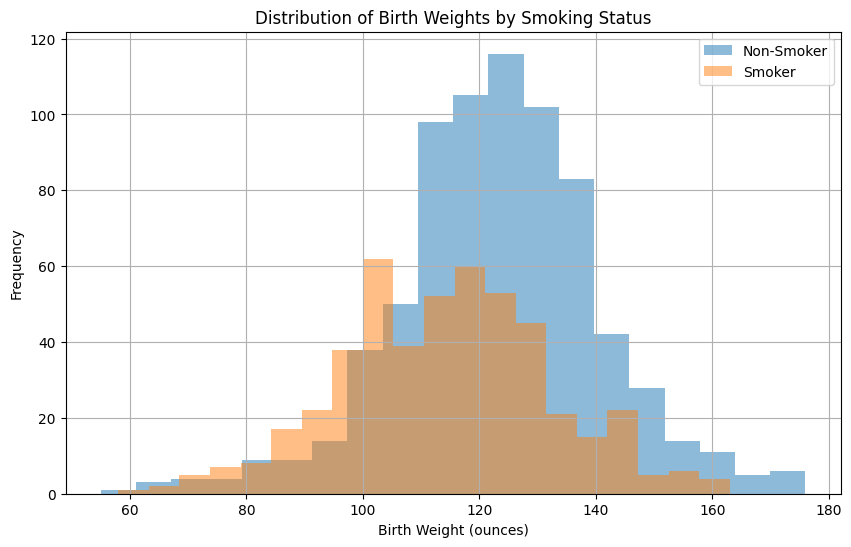

<Figure size 800x600 with 0 Axes>

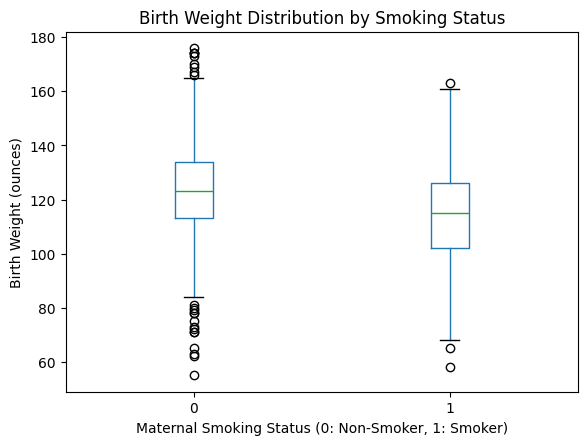

In [ ]:
# Overlaid Histograms of Birth Weights
plt.figure(figsize=(10, 6))
plt.hist(babies[babies['smoke'] == 0]['bwt'], bins=20, alpha=0.5, label='Non-Smoker')
plt.hist(babies[babies['smoke'] == 1]['bwt'], bins=20, alpha=0.5, label='Smoker')
plt.xlabel('Birth Weight (ounces)')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Weights by Smoking Status')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot of Birth Weights by Smoking Status
plt.figure(figsize=(8, 6))
babies.boxplot(column='bwt', by='smoke', grid=False)
plt.xlabel('Maternal Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Birth Weight (ounces)')
plt.title('Birth Weight Distribution by Smoking Status')
plt.suptitle('') # Suppress the default suptitle generated by boxplot
plt.show()

In [ ]:
print('Descriptive Statistics of Birth Weights by Smoking Status:')
bwt_stats = babies.groupby('smoke')['bwt'].agg(['mean', 'median', 'std', 'skew'])
print(bwt_stats)

Descriptive Statistics of Birth Weights by Smoking Status:
             mean  median        std      skew
smoke                                         
0      123.047170   123.0  17.398689 -0.187363
1      114.109504   115.0  18.098946 -0.033700


In [ ]:
x = babies['bwt']
mu = np.mean(x)
sigma = np.std(x, ddof=1)

kurtosis = np.mean((x - mu)**4) / sigma**4
excess_kurtosis = kurtosis - 3
print(kurtosis)
print(excess_kurtosis)

3.455204378999025
0.4552043789990252


Based only on the graphs and stats (no hypothesis tests yet), does it look like
smoking affects birth weight?

---


Yes, we can infer that smoking affects birth weight using the graph, we can clearly see the peak shifting right in non smoking dataset .while smoking dataset has more points towards the less bodyweight side


In [ ]:
non_smoker_babies = babies[babies['smoke'] == 0]['bwt']
smoker_babies = babies[babies['smoke'] == 1]['bwt']

sample1 = non_smoker_babies.sample(n=100, random_state=42) # Using random_state for reproducibility
sample2 = non_smoker_babies.sample(n=100, random_state=123)
sample3 = smoker_babies.sample(n=100, random_state=123) # Another random_state for a different sample


mean_sample1 = sample1.mean()
mean_sample2 = sample2.mean()
mean_sample3 = sample3.mean()

print(f"Mean of first 100 non-smoking birth weight samples: {mean_sample1:.2f}")
print(f"Mean of second 100 non-smoking birth weight samples: {mean_sample2:.2f}")
print(f"Mean of first 100 smoking birth weight samples: {mean_sample3:.2f}")

Mean of first 100 non-smoking birth weight samples: 123.98
Mean of second 100 non-smoking birth weight samples: 124.12
Mean of first 100 smoking birth weight samples: 112.91


In [ ]:
babies = babies[~(babies['gestation'] == 999)]

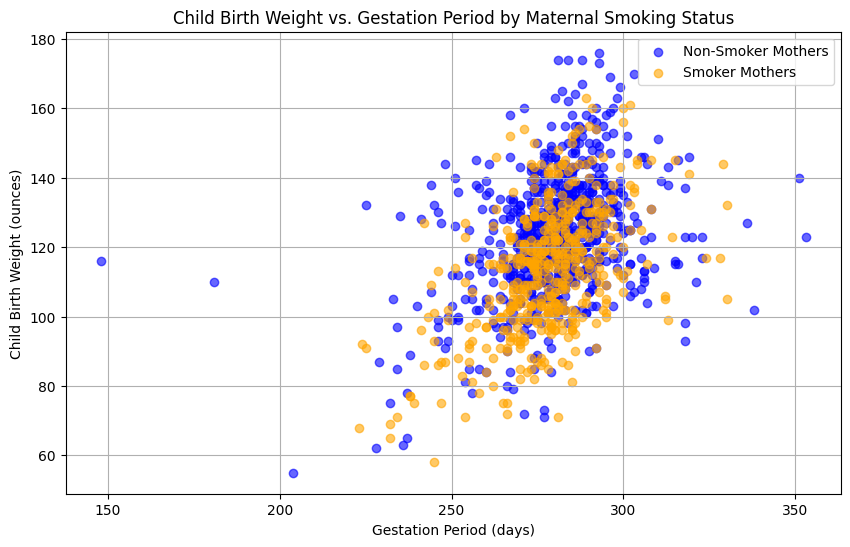

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for non-smoker data (blue dots)
plt.scatter(babies[babies['smoke'] == 0]['gestation'],
            babies[babies['smoke'] == 0]['bwt'],
            color='blue',
            alpha=0.6,
            label='Non-Smoker Mothers')

# Scatter plot for smoker data (orange dots)
plt.scatter(babies[babies['smoke'] == 1]['gestation'],
            babies[babies['smoke'] == 1]['bwt'],
            color='orange',
            alpha=0.6,
            label='Smoker Mothers')

plt.xlabel('Gestation Period (days)')
plt.ylabel('Child Birth Weight (ounces)')
plt.title('Child Birth Weight vs. Gestation Period by Maternal Smoking Status')
plt.legend()
plt.grid(True)
plt.show()

 Explore the data in your own way and make other such plots to compare
different groups.

---
we can see that sampling the same dataset gives mean which is almost equal, but the mean of different dataset is different by approx 10 ounces which is much bigger than difference is samples .



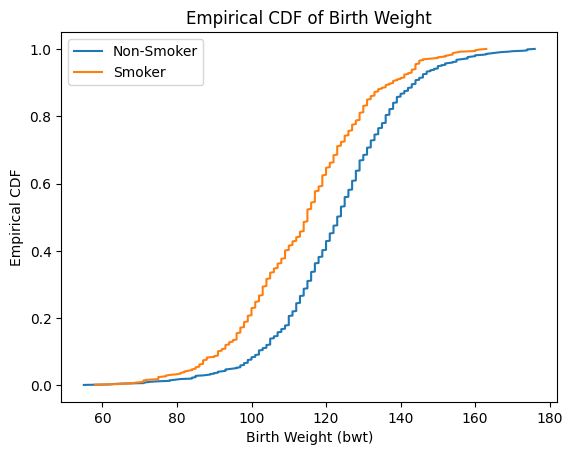

In [ ]:
bwt_nonsmoke = babies[babies['smoke'] == 0]['bwt']
bwt_smoke = babies[babies['smoke'] == 1]['bwt']

# Sort the data
x_nonsmoke = np.sort(bwt_nonsmoke)
x_smoke = np.sort(bwt_smoke)

# Create ECDF values
y_nonsmoke = np.arange(1, len(x_nonsmoke)+1) / len(x_nonsmoke)
y_smoke = np.arange(1, len(x_smoke)+1) / len(x_smoke)

# Plot
plt.figure()
plt.plot(x_nonsmoke, y_nonsmoke, label='Non-Smoker')
plt.plot(x_smoke, y_smoke, label='Smoker')

plt.xlabel('Birth Weight (bwt)')
plt.ylabel('Empirical CDF')
plt.legend()
plt.title('Empirical CDF of Birth Weight')
plt.show()

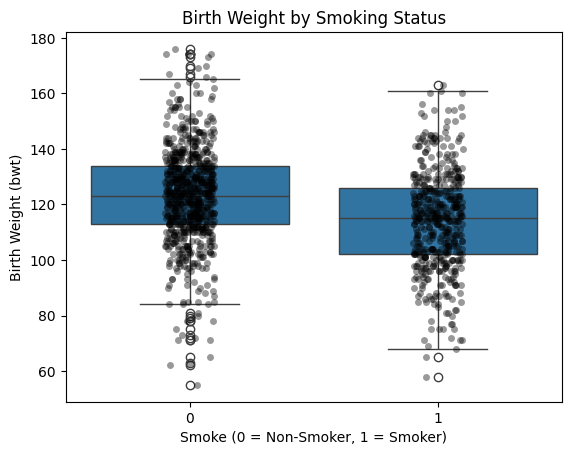

In [ ]:
plt.figure()
sns.boxplot(x='smoke', y='bwt', data=babies)
sns.stripplot(x='smoke', y='bwt', data=babies, color='black', alpha=0.4, jitter=True)

plt.xlabel('Smoke (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Birth Weight (bwt)')
plt.title('Birth Weight by Smoking Status')
plt.show()


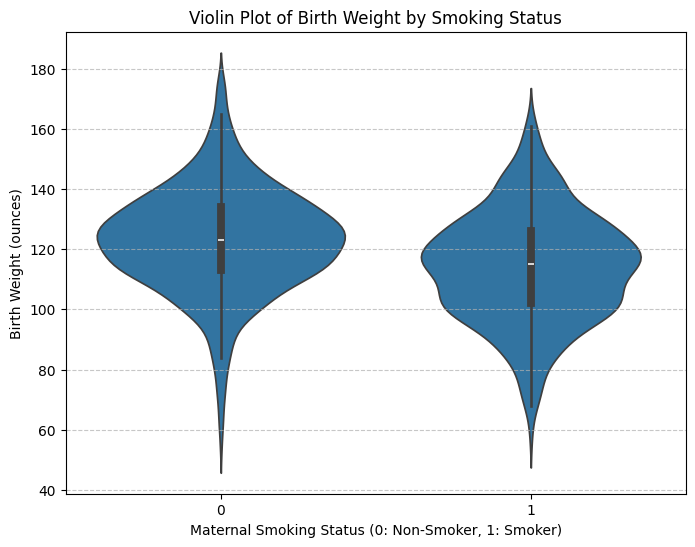

In [ ]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='smoke', y='bwt', data=babies)

plt.xlabel('Maternal Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Birth Weight (ounces)')
plt.title('Violin Plot of Birth Weight by Smoking Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Part B:**

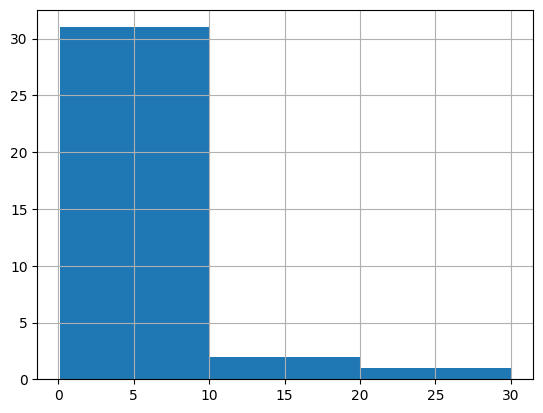

In [ ]:
gamesh=pd.read_fwf('/content/sample_data/video.data')
gamesh[['time', 'like']] = gamesh['time like'].str.split(expand=True)
gamesh['time'] = pd.to_numeric(gamesh['time'],downcast="float", errors='coerce')
gamesh = gamesh[gamesh['time'] > 0] # Filter out time = 0
hist = gamesh['time'].hist(bins=3)
plt.show()

MOM Estimates


In [ ]:
# Calculate the first two raw moments from the 'time' data
mean_time = gamesh['time'].mean()
mean_time_squared = (gamesh['time']**2).mean()

# Calculate the variance
variance_time = mean_time_squared - (mean_time)**2

# Derive MOM estimates for alpha (shape) and beta (scale)
# For a Gamma distribution with shape alpha and scale beta:
# E[X] = alpha * beta
# Var[X] = alpha * beta^2
# From these, we can derive:
# alpha = (E[X])^2 / Var[X]
# beta = Var[X] / E[X]

alpha_mom = (mean_time**2) / variance_time
beta_mom = variance_time / mean_time

print(f"MOM estimate for shape (alpha): {alpha_mom:.4f}")
print(f"MOM estimate for scale (beta): {beta_mom:.4f}")

MOM estimate for shape (alpha): 0.3589
MOM estimate for scale (beta): 9.2687


In [ ]:
from scipy.special import gamma
import numpy as np

def neg_log_likelihood_gamma(params, data):
    alpha, beta = params

    # Ensure alpha and beta are positive
    if alpha <= 0 or beta <= 0:
        return np.inf  # Return a very large number for invalid parameters

    # Calculate the log-likelihood for each data point
    # The Gamma PDF is: f(x; alpha, beta) = (1 / (gamma(alpha) * beta^alpha)) * x^(alpha-1) * exp(-x/beta)
    # The log-likelihood is: log(f(x)) = (alpha-1)log(x) - x/beta - alpha*log(beta) - log(gamma(alpha))
    log_likelihoods = (alpha - 1) * np.log(data) - (data / beta) - (alpha * np.log(beta)) - np.log(gamma(alpha))

    # Sum the individual log-likelihoods and return the negative sum
    return -np.sum(log_likelihoods)

## Estimate Parameters with Custom MLE


In [ ]:
from scipy.optimize import minimize

# Extract the 'time' data
time_data = gamesh['time'].to_numpy()

# Initial guess for alpha and beta (using MOM estimates as a good starting point)
initial_guess = [alpha_mom, beta_mom]

# Define bounds for alpha and beta to ensure they are positive
bounds = ((1e-6, None), (1e-6, None)) # Alpha > 0, Beta > 0

# Perform the optimization
mle_results = minimize(neg_log_likelihood_gamma, initial_guess, args=(time_data,), method='L-BFGS-B', bounds=bounds)

# Extract the optimized parameters
alpha_mle_custom, beta_mle_custom = mle_results.x

print(f"Custom MLE estimate for shape (alpha): {alpha_mle_custom:.4f}")
print(f"Custom MLE estimate for scale (beta): {beta_mle_custom:.4f}")

Custom MLE estimate for shape (alpha): 0.9198
Custom MLE estimate for scale (beta): 3.6167


## Estimate Parameters with Scipy Fit



In [ ]:
from scipy.stats import gamma

# Use scipy.stats.gamma.fit to estimate the parameters
# The fit method returns shape (alpha), loc, and scale (beta)
alpha_mle_scipy, loc_mle_scipy, beta_mle_scipy = gamma.fit(time_data, floc=0) # floc=0 forces location parameter to 0

print(f"Scipy MLE estimate for shape (alpha): {alpha_mle_scipy:.4f}")
print(f"Scipy MLE estimate for scale (beta): {beta_mle_scipy:.4f}")

Scipy MLE estimate for shape (alpha): 0.9198
Scipy MLE estimate for scale (beta): 3.6167


# Task
Generate a density histogram of the `time_data` and overlay two Gamma Probability Density Functions (PDFs): one using the MOM estimated parameters (`alpha_mom`, `beta_mom`) and another using the custom MLE estimated parameters (`alpha_mle_custom`, `beta_mle_custom`). Include a legend, axis labels, and a title. Visually compare the overlaid PDFs with the histogram and summarize which Gamma PDF (MOM or MLE) provides a better fit to the peak of the observed data distribution.

## Plot Density Histogram and Overlay Gamma PDFs

### Subtask:
Generate a density histogram of the 'time_data'. Overlay two Gamma Probability Density Functions (PDFs): one using the MOM estimated parameters (alpha_mom, beta_mom) and another using the MLE estimated parameters (alpha_mle_custom, beta_mle_custom). Ensure the plot includes a legend, axis labels, and a title.


**Reasoning**:
To visualize the fit of the estimated Gamma distribution parameters, I will generate a density histogram of the 'time_data' and overlay the Probability Density Functions (PDFs) calculated using both the MOM and custom MLE parameters. This involves using matplotlib for plotting and scipy.stats.gamma for PDF calculation.



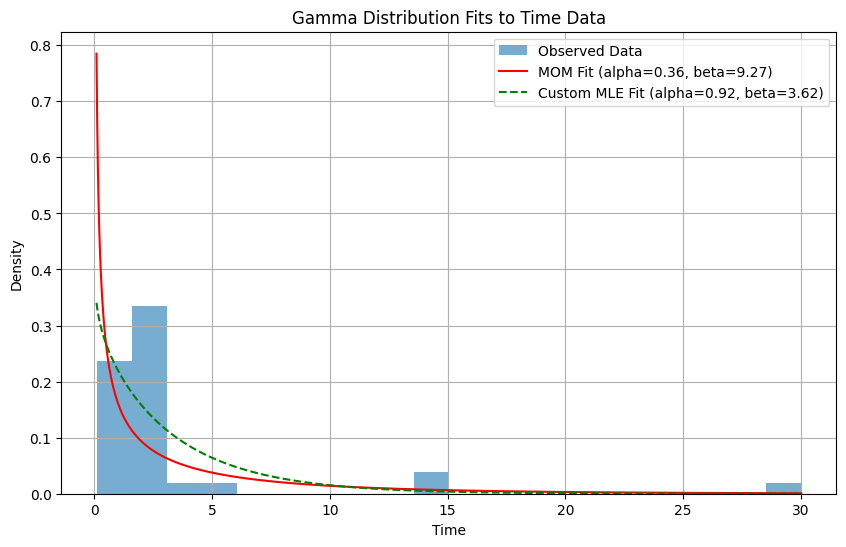

In [ ]:
plt.figure(figsize=(10, 6))

# 2. Generate a density histogram of the 'time_data'
plt.hist(time_data, bins=20, density=True, alpha=0.6, label='Observed Data')

# 3. Create a range of x-values for plotting the Gamma PDFs
x = np.linspace(time_data.min(), time_data.max(), 1000)

# 4. Calculate and plot PDF for MOM estimated parameters
pdf_mom = gamma.pdf(x, a=alpha_mom, scale=beta_mom)
plt.plot(x, pdf_mom, 'r-', label=f'MOM Fit (alpha={alpha_mom:.2f}, beta={beta_mom:.2f})')

# 5. Calculate and plot PDF for custom MLE estimated parameters
pdf_mle_custom = gamma.pdf(x, a=alpha_mle_custom, scale=beta_mle_custom)
plt.plot(x, pdf_mle_custom, 'g--', label=f'Custom MLE Fit (alpha={alpha_mle_custom:.2f}, beta={beta_mle_custom:.2f})')

# 6. Add a title to the plot
plt.title('Gamma Distribution Fits to Time Data')

# 7. Label the x-axis and y-axis
plt.xlabel('Time')
plt.ylabel('Density')

# 8. Display a legend on the plot
plt.legend()

# 9. Show the plot
plt.grid(True)
plt.show()

Based on the generated plot, the **Custom MLE Fit** (green dashed line) appears to provide a better fit to the peak of the observed data distribution compared to the MOM Fit (red solid line). The custom MLE curve more closely aligns with the highest bars of the histogram, especially in the initial rise and peak, indicating it captures the central tendency and shape of the most frequent `time_data` values more accurately.